**Nama Peserta:**

* Ammar Ridwan Darma 
* Alif Adwitiya Pratama
* Nur Imam Masri

**Universitas Host:**

Universitas Gajah Mada


**Kelas:**

UGM-01


**Kelompok:** 1


**Tema Project Kelompok:**  

Iklim Cuaca

# **import libraries**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# import Library SelectKBest
from sklearn.feature_selection import SelectKBest

# import Library chi kuadrat/squared
from sklearn.feature_selection import chi2

In [2]:
plt.style.use('seaborn')

# **Data Loading**


[Data Prakiraan Cuaca Wilayah Provinsi DKI Jakarta Tahun 2018](https://data.jakarta.go.id/dataset/data-prakiraan-cuaca-wilayah-provinsi-dki-jakarta-tahun-2018)

[Data Prakiraan Cuaca Wilayah Provinsi DKI Jakarta Tahun 2017](https://data.jakarta.go.id/dataset/data-prakiraan-cuaca-wilayah-provinsi-dki-jakarta-tahun-2017)


### **Attribute Information**

Dataset ini berisi Prakiraan Cuaca di Wilayah Provinsi DKI Jakarta tiap bulannya pada Tahun 2018.

Penjelasan mengenai variabel pada dataset ini :

1. tanggal.
2. wilayah
3. waktu.
4. cuaca
5. kelembaban_persen,
6. suhu_derajat_celcius

**Metadata :**

* Terakhir Diperbarui : 21 Januari 2019
* Dibuat : 30 Januari 2018
* Sumber : BPBD DKI Jakarta
* Frekuensi Penerbitan : 1 Bulan Sekali
* Tahun : 2018
* Cakupan : Provinsi
* Penyajian : Wilayah
* Kontak : bpbddki@jakarta.go.id 021-3521623

Mounted at /content/drive


/content/drive/Shareddrives/Microcredential data team 1


In [3]:
# Data Prakiraan Cuaca Wilayah Provinsi DKI Jakarta Tahun 2018 dan 2017
df =pd.read_excel('cuaca2017-2018.xlsx', usecols=['tanggal', 'wilayah', 'waktu', 'cuaca',
       'kelembaban_persen', 'suhu_derajat_celcius', 'BanyakKotaRawan'])
df.head(5)

tanggal           wilayah  waktu         cuaca kelembaban_persen  \
0 2017-01-03     Jakarta Pusat   Pagi  Hujan Ringan           65 - 95   
1 2017-01-03  Kepulauan Seribu  Malam  Hujan Ringan           65 - 95   
2 2017-01-03     Jakarta Timur  Malam  Hujan Ringan           65 - 95   
3 2017-01-03     Jakarta Barat  Malam  Hujan Ringan           65 - 95   
4 2017-01-03   Jakarta Selatan  Malam  Hujan Ringan           65 - 95   

  suhu_derajat_celcius  BanyakKotaRawan  
0              22 - 31                2  
1              22 - 31                0  
2              22 - 31               23  
3              22 - 31               17  
4              22 - 31               25

Ada 14652 baris data yang berarti ada 14652 cuaca tiap saat

7 kolom yang berarti 7 columns (Features)

In [4]:
# the shape of data
print('Total Row:', df.shape[0])
print('Total Columns:', df.shape[1])
df.shape

Total Row: 14652
Total Columns: 7


(14652, 7)

In [5]:
# get the columns
df.columns

Index(['tanggal', 'wilayah', 'waktu', 'cuaca', 'kelembaban_persen',
       'suhu_derajat_celcius', 'BanyakKotaRawan'],
      dtype='object')

## **Wilayah**

**Daftar Tiap Wilayah di Provinsi DKI Jakarta**

In [6]:
np.unique(df['wilayah'])

array(['Jakarta Barat', 'Jakarta Pusat', 'Jakarta Selatan',
       'Jakarta Timur', 'Jakarta Utara', 'Kepulauan Seribu'], dtype=object)

## **Cuaca**

**Daftar Cuaca Tiap Wilayah di Provinsi DKI Jakarta**

In [7]:
np.unique(df['cuaca'])

array(['Beawan', 'Berawa', 'Berawan', 'Berawan Sedang', 'Berawan Teba',
       'Berawan Tebal', 'Berawan tebal', 'Cerah', 'Cerah Berawah',
       'Cerah Berawan', 'Cerah Berawn', 'Cerah berawan', 'Cerang Berawan',
       'Hujan', 'Hujan Loka', 'Hujan Lokal', 'Hujan Petir',
       'Hujan RIngan', 'Hujan Ringan', 'Hujan Ringanl', 'Hujan Sedang',
       'Hujang Sedang', 'Udara Kabur'], dtype=object)

In [8]:
df[(df['cuaca']=="Beawan") | (df['cuaca']=="Berawa")] = "Berawan"
df[(df['cuaca']=="Berawan Teba") | (df['cuaca']=="Berawan tebal")] = "Berawan Tebal"
df[
   (df['cuaca']=="Cerang Berawah") | 
   (df['cuaca']=="Cerah Berawn") | 
   (df['cuaca']=="Cerah berawan") |
   (df['cuaca']=="Cerah Berawah") | 
   (df['cuaca']=="Cerang Berawan")
   ] = "Cerah Berawan"

df[(df['cuaca']=="Hujan Loka")] = "Hujan Lokal"
df[(df['cuaca']=="Hujan RIngan") | (df['cuaca']=="Hujan Ringanl")] = "Hujan Ringan"
df[(df['cuaca']=="Hujang Sedang")] = "Hujan Sedang"

In [9]:
np.unique(df['cuaca'])

array(['Berawan', 'Berawan Sedang', 'Berawan Tebal', 'Cerah',
       'Cerah Berawan', 'Hujan', 'Hujan Lokal', 'Hujan Petir',
       'Hujan Ringan', 'Hujan Sedang', 'Udara Kabur'], dtype=object)

## **Persen Kelembapan**

**Daftar Persen Kelembapan Tiap Wilayah di Provinsi DKI Jakarta**

In [10]:
np.unique(df['kelembaban_persen'])

array(['35 – 75', '35 – 80', '40 - 70', '40 – 75', '40 – 80', '40 – 85',
       '40 – 90', '40 – 95', '45 - 80', '45 – 75', '45 – 80', '45 – 85',
       '45 – 90', '50 - 75', '50 - 80', '50 - 92', '50 – 80', '50 – 85',
       '50 – 90', '50 – 95', '55 - 100', '55 - 75', '55 - 80', '55 - 85',
       '55 - 90', '55 - 95', '55 – 80', '55 – 85', '55 – 90', '55 – 95',
       '55-85%', '60 - 100', '60 - 80', '60 - 85', '60 - 90', '60 - 95',
       '60 – 100', '60 – 80', '60 – 85', '60 – 90', '60 – 95', '60-90%',
       '60-95%', '65 - 100', '65 - 80', '65 - 85', '65 - 90', '65 - 95',
       '65 - 97', '65 – 100', '65 – 85', '65 – 90', '65 – 95', '65-100%',
       '65-90%', '65-95%', '70 - 100', '70 - 85', '70 - 90', '70 - 95',
       '70 – 100', '70 – 80', '70 – 90', '70 – 95', '70-95%', '75 - 100',
       '75 - 85', '75 - 90', '75 - 95', '75 – 100', '75 – 95', '75-90%',
       '75-95%', '80 - 100', '80 - 90', '80 - 95', '80 – 100', '80 – 95',
       '80-100%', '80-95%', '85 - 100', '85 - 90

In [11]:
selection = df['kelembaban_persen'].str.contains('%', regex=True)
df.loc[selection, 'kelembaban_persen'] = df.loc[selection, 'kelembaban_persen'].map(lambda x: x.replace("%", ""))

In [12]:
selection02 = df['kelembaban_persen'].str.contains(' – ', regex=True)
df.loc[selection02, 'kelembaban_persen'] = df.loc[selection02, 'kelembaban_persen'].map(lambda x: x.replace(" – ", "-"))

In [13]:
selection03 = df['kelembaban_persen'].str.contains(' - ', regex=True)
df.loc[selection03, 'kelembaban_persen'] = df.loc[selection03, 'kelembaban_persen'].map(lambda x: x.replace(" - ", "-"))

In [14]:
np.unique(df['kelembaban_persen'])

array(['35-75', '35-80', '40-70', '40-75', '40-80', '40-85', '40-90',
       '40-95', '45-75', '45-80', '45-85', '45-90', '50-75', '50-80',
       '50-85', '50-90', '50-92', '50-95', '55-100', '55-75', '55-80',
       '55-85', '55-90', '55-95', '60-100', '60-80', '60-85', '60-90',
       '60-95', '65-100', '65-80', '65-85', '65-90', '65-95', '65-97',
       '70-100', '70-80', '70-85', '70-90', '70-95', '75-100', '75-85',
       '75-90', '75-95', '80-100', '80-90', '80-95', '85-100', '85-90',
       '85-95', '90-95', '95-95', 'Berawan', 'Berawan Tebal',
       'Cerah Berawan', 'Hujan Lokal', 'Hujan Ringan', 'Hujan Sedang'],
      dtype=object)

In [15]:
trash = ['Berawan', 'Berawan Tebal', 'Cerah Berawan', 'Hujan Lokal', 'Hujan Ringan', 'Hujan Sedang']
for x in trash :
  df.drop(df.loc[df['kelembaban_persen']==x].index, inplace=True)

In [16]:
np.unique(df['kelembaban_persen'])

array(['35-75', '35-80', '40-70', '40-75', '40-80', '40-85', '40-90',
       '40-95', '45-75', '45-80', '45-85', '45-90', '50-75', '50-80',
       '50-85', '50-90', '50-92', '50-95', '55-100', '55-75', '55-80',
       '55-85', '55-90', '55-95', '60-100', '60-80', '60-85', '60-90',
       '60-95', '65-100', '65-80', '65-85', '65-90', '65-95', '65-97',
       '70-100', '70-80', '70-85', '70-90', '70-95', '75-100', '75-85',
       '75-90', '75-95', '80-100', '80-90', '80-95', '85-100', '85-90',
       '85-95', '90-95', '95-95'], dtype=object)

## **Suhu Derajat Celcius**

**Daftar Suhu Derajat Celcius Tiap Wilayah di Provinsi DKI Jakarta**

In [17]:
np.unique(df['suhu_derajat_celcius'])

array(['20 – 34', '21 - 32', '21 - 33', '21 - 34', '21 – 33', '21 – 34',
       '22 - 31', '22 - 32', '22 - 33', '22 – 30', '22 – 32', '22 – 33',
       '22 – 34', '22 – 35', '23 - 31', '23 - 32', '23 - 33', '23 - 34',
       '23 – 28', '23 – 29', '23 – 30', '23 – 31', '23 – 32', '23 – 33',
       '23 – 34', '23 – 35', '23-29°', '23-30°', '23-31°', '23-32°',
       '23-33°', '24 - 28', '24 - 29', '24 - 30', '24 - 31', '24 - 32',
       '24 - 33', '24 - 34', '24 – 28', '24 – 29', '24 – 30', '24 – 31',
       '24 – 32', '24 – 33', '24 – 34', '24 – 35', '24-32°', '24-33°',
       '24-34°', '25 - 31', '25 - 32', '25 - 33', '25 - 34', '25 – 30',
       '25 – 31', '25 – 32', '25 – 33', '25 – 34', '25 – 35', '26 - 32',
       '26 - 33', '26 - 34', '26 – 32', '26 – 33', '27 - 29', '27 - 32'],
      dtype=object)

In [20]:
selection = df['suhu_derajat_celcius'].str.contains('°', regex=True)
df.loc[selection, 'suhu_derajat_celcius'] = df.loc[selection, 'suhu_derajat_celcius'].map(lambda x: x.replace("°", ""))

In [21]:
selection02 = df['suhu_derajat_celcius'].str.contains(' – ', regex=True)
df.loc[selection02, 'suhu_derajat_celcius'] = df.loc[selection02, 'suhu_derajat_celcius'].map(lambda x: x.replace(" – ", "-"))

In [22]:
selection03 = df['suhu_derajat_celcius'].str.contains(' - ', regex=True)
df.loc[selection03, 'suhu_derajat_celcius'] = df.loc[selection03, 'suhu_derajat_celcius'].map(lambda x: x.replace(" - ", "-"))

In [23]:
np.unique(df['suhu_derajat_celcius'])

array(['20-34', '21-32', '21-33', '21-34', '22-30', '22-31', '22-32',
       '22-33', '22-34', '22-35', '23-28', '23-29', '23-30', '23-31',
       '23-32', '23-33', '23-34', '23-35', '24-28', '24-29', '24-30',
       '24-31', '24-32', '24-33', '24-34', '24-35', '25-30', '25-31',
       '25-32', '25-33', '25-34', '25-35', '26-32', '26-33', '26-34',
       '27-29', '27-32'], dtype=object)

## **Banyak Kota Rawan**

**Daftar Suhu Derajat Celcius Tiap Wilayah di Provinsi DKI Jakarta**

In [24]:
df['BanyakKotaRawan']=df.BanyakKotaRawan.astype('int64')

In [25]:
np.unique(df['BanyakKotaRawan'])

array([ 0,  2, 15, 17, 23, 25], dtype=int64)

In [26]:
df.head(10)

tanggal           wilayah  waktu         cuaca  \
0  2017-01-03 00:00:00     Jakarta Pusat   Pagi  Hujan Ringan   
1  2017-01-03 00:00:00  Kepulauan Seribu  Malam  Hujan Ringan   
2  2017-01-03 00:00:00     Jakarta Timur  Malam  Hujan Ringan   
3  2017-01-03 00:00:00     Jakarta Barat  Malam  Hujan Ringan   
4  2017-01-03 00:00:00   Jakarta Selatan  Malam  Hujan Ringan   
5  2017-01-03 00:00:00     Jakarta Pusat  Malam  Hujan Ringan   
6  2017-01-03 00:00:00  Kepulauan Seribu  Siang   Hujan Petir   
7  2017-01-03 00:00:00     Jakarta Timur  Siang   Hujan Petir   
8  2017-01-03 00:00:00     Jakarta Barat  Siang   Hujan Petir   
9  2017-01-03 00:00:00     Jakarta Utara  Malam  Hujan Ringan   

  kelembaban_persen suhu_derajat_celcius  BanyakKotaRawan  
0             65-95                22-31                2  
1             65-95                22-31                0  
2             65-95                22-31               23  
3             65-95                22-31               17  
4             65-95                22-31               25  
5             65-95                22-31                2  
6             65-95                22-31                0  
7             65-95                22-31               23  
8             65-95                22-31               17  
9             65-95                22-31               15

# **Data Describe**

In [27]:
# get the info of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14638 entries, 0 to 14651
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   tanggal               14638 non-null  object
 1   wilayah               14638 non-null  object
 2   waktu                 14638 non-null  object
 3   cuaca                 14638 non-null  object
 4   kelembaban_persen     14638 non-null  object
 5   suhu_derajat_celcius  14638 non-null  object
 6   BanyakKotaRawan       14638 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 914.9+ KB


In [28]:
df.describe(include=object)

tanggal        wilayah  waktu          cuaca  \
count                 14638          14638  14638          14638   
unique                  613              6      8             11   
top     2018-11-11 00:00:00  Jakarta Pusat  Siang  Cerah Berawan   
freq                     48           2442   3348           5169   

       kelembaban_persen suhu_derajat_celcius  
count              14638                14638  
unique                52                   37  
top                65-95                24-33  
freq                1432                 2847

In [29]:
df.describe()

BanyakKotaRawan
count     14638.000000
mean         13.661361
std           9.587090
min           0.000000
25%           2.000000
50%          15.000000
75%          23.000000
max          25.000000

In [30]:
df.groupby('cuaca').mean()

BanyakKotaRawan
cuaca                          
Berawan               13.910234
Berawan Sedang         0.000000
Berawan Tebal         13.937500
Cerah                 11.113030
Cerah Berawan         13.458696
Hujan                 22.333333
Hujan Lokal           13.307573
Hujan Petir           17.068966
Hujan Ringan          13.652397
Hujan Sedang          15.707547
Udara Kabur           18.222222

# **Data Preprocessing - Missing Value**

Lanjutkan preprosing data dan hitung semua kolom yang berisi missing value (NaN, NAN, na). 

Dapat dilihat bahwa pada column 'Unnamed: 32', yang berisi 569 missing value (jumlah baris yang sama dalam kumpulan data, sehingga column ini tidak berguna dalam kasus ini)

In [31]:
df.isnull().any()

tanggal                 False
wilayah                 False
waktu                   False
cuaca                   False
kelembaban_persen       False
suhu_derajat_celcius    False
BanyakKotaRawan         False
dtype: bool

In [32]:
df.isna().sum()

tanggal                 0
wilayah                 0
waktu                   0
cuaca                   0
kelembaban_persen       0
suhu_derajat_celcius    0
BanyakKotaRawan         0
dtype: int64

In [33]:
df = df.dropna(axis=1)

Mengecek kembali shape dataset

In [34]:
df.shape

(14638, 7)

Selain itu untuk kolom `tanggal` tidak berpengaruh pada pengujian. Sehingga kita buang.

In [35]:
df = df.drop(['tanggal'], axis=1)

Menghapus yang mempunyai hanya satu nilai, karena nanti akan ada stratify

In [36]:
for i in np.unique(df['cuaca']).tolist():
  print(i)
  print(df[df["cuaca"]==i].shape[0])

df.drop(df.loc[df['cuaca']=="Berawan Sedang"].index, inplace=True)

Berawan
4055
Berawan Sedang
1
Berawan Tebal
896
Cerah
637
Cerah Berawan
5169
Hujan
3
Hujan Lokal
1928
Hujan Petir
348
Hujan Ringan
1168
Hujan Sedang
424
Udara Kabur
9


# **Data Visualization**

In [37]:
df.head(5)

wilayah  waktu         cuaca kelembaban_persen  \
0     Jakarta Pusat   Pagi  Hujan Ringan             65-95   
1  Kepulauan Seribu  Malam  Hujan Ringan             65-95   
2     Jakarta Timur  Malam  Hujan Ringan             65-95   
3     Jakarta Barat  Malam  Hujan Ringan             65-95   
4   Jakarta Selatan  Malam  Hujan Ringan             65-95   

  suhu_derajat_celcius  BanyakKotaRawan  
0                22-31                2  
1                22-31                0  
2                22-31               23  
3                22-31               17  
4                22-31               25

**Visualisasi banyak cuaca per data**

In [38]:
# Jumlah  data per cuaca
df['cuaca'].value_counts()

Cerah Berawan    5169
Berawan          4055
Hujan Lokal      1928
Hujan Ringan     1168
Berawan Tebal     896
Cerah             637
Hujan Sedang      424
Hujan Petir       348
Udara Kabur         9
Hujan               3
Name: cuaca, dtype: int64

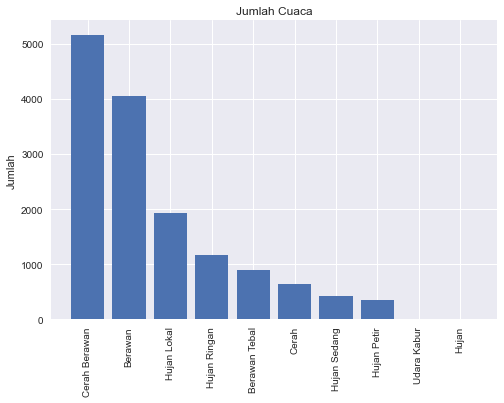

In [39]:
df_cuaca = df['cuaca'].value_counts()
x_coords = np.arange(len(list(df_cuaca.index)))
plt.bar(x_coords, list(df_cuaca.values), tick_label=list(df_cuaca.index))
plt.xticks(rotation=90)
plt.ylabel('Jumlah')
plt.title('Jumlah Cuaca')
plt.show()

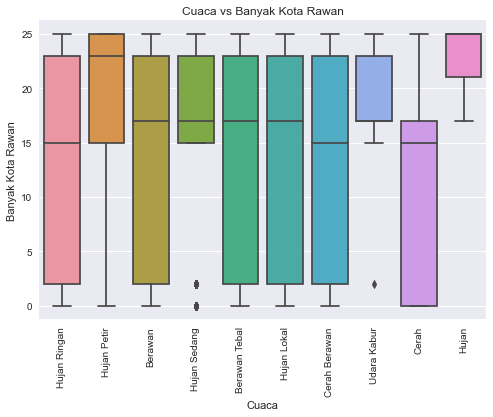

In [40]:
sns.boxplot(data=df, x='cuaca', y='BanyakKotaRawan')
plt.ylabel("Banyak Kota Rawan")
plt.xlabel("Cuaca")
plt.title('Cuaca vs Banyak Kota Rawan')
plt.xticks(rotation=90)
plt.show()

# **Data Preprocessing - Handling Categorical Values**

Lihat tipe data untuk melihat kolom mana yang perlu ditransformasikan / encode. 

Dapat dilihat dari tipe datanya bahwa semua columns / features adalah object kecuali untuk kolom 'BanyakKotaRawan', yang merupakan data numerical

In [41]:
df.dtypes

wilayah                 object
waktu                   object
cuaca                   object
kelembaban_persen       object
suhu_derajat_celcius    object
BanyakKotaRawan          int64
dtype: object

Encode data kategorikal untuk target (cuaca) dengan mengubah nilai di 'diagnosis' masing-masing dari 

|Cuaca|Label|
|----|----|
|'Berawan'|0|
|'Berawan Sedang'|1|
|'Berawan Tebal'|2|
|'Cerah'|3|
|'Cerah Berawan'|4| 
|'Hujan'|5|
|'Hujan Lokal'|6|
|'Hujan Petir'|7|
|'Hujan Ringan'|8|
|'Hujan Sedang'|9|
|'Udara Kabur'|10|

['Hujan Ringan' 'Hujan Petir' 'Berawan' 'Hujan Sedang' 'Berawan Tebal'
 'Hujan Lokal' 'Cerah Berawan' 'Udara Kabur' 'Cerah' 'Hujan']

 [7 6 0 8 1 5 3 9 2 4]



In [42]:
target = {}
label = [7, 6, 0, 8, 1, 5, 3, 9, 2, 4]
for i, x in enumerate(['Hujan Ringan', 'Hujan Petir', 'Berawan', 'Hujan Sedang', 'Berawan Tebal', 'Hujan Lokal', 'Cerah Berawan', 'Udara Kabur', 'Cerah', 'Hujan']):
    target[x] = label[i]

target

{'Hujan Ringan': 7,
 'Hujan Petir': 6,
 'Berawan': 0,
 'Hujan Sedang': 8,
 'Berawan Tebal': 1,
 'Hujan Lokal': 5,
 'Cerah Berawan': 3,
 'Udara Kabur': 9,
 'Cerah': 2,
 'Hujan': 4}

In [43]:
target = ['Berawan', 'Berawan Tebal', 'Cerah', 'Cerah Berawan', 'Hujan', 'Hujan Ringan', 'Hujan Lokal', 'Hujan Petir', 'Hujan Sedang', 'Udara Kabur']

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
le = LabelEncoder()

In [46]:
print(df.cuaca.unique())
df[["cuaca"]].head()

['Hujan Ringan' 'Hujan Petir' 'Berawan' 'Hujan Sedang' 'Berawan Tebal'
 'Hujan Lokal' 'Cerah Berawan' 'Udara Kabur' 'Cerah' 'Hujan']


cuaca
0  Hujan Ringan
1  Hujan Ringan
2  Hujan Ringan
3  Hujan Ringan
4  Hujan Ringan

In [47]:
df.loc[:, ["cuaca"]] = le.fit_transform(df["cuaca"])
print(df.cuaca.unique())
df[["cuaca"]].head()

[7 6 0 8 1 5 3 9 2 4]


cuaca
0      7
1      7
2      7
3      7
4      7

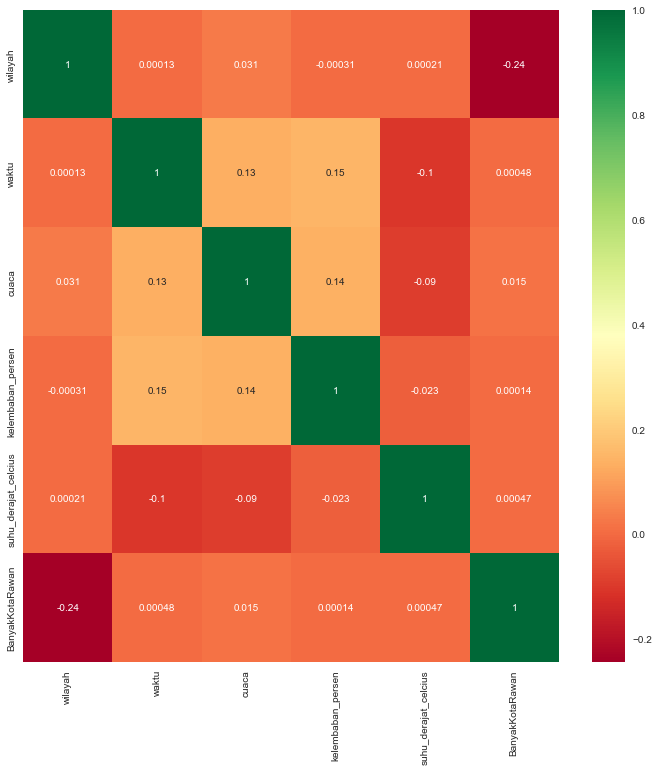

In [48]:
col_cat = [x for x in df.columns if x not in ["cuaca", "BanyakKotaRawan"]]
df2 = df.copy()

for x in col_cat:
  df2.loc[:, [x]] = le.fit_transform(df2[x])

K = df2[col_cat]
j = df2["cuaca"]

# mendapatkan korelasi di setiap fitur dalam dataset
corrmat = df2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,12))

# plot heatmap
h = sns.heatmap(df2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [49]:
col_cat = [x for x in df.columns if x not in ["cuaca", "BanyakKotaRawan"]]
col_cat

['wilayah', 'waktu', 'kelembaban_persen', 'suhu_derajat_celcius']

In [50]:
for var in col_cat:
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data1= df.join(cat_list)
    df=data1

In [52]:
df.head()

wilayah  waktu  cuaca kelembaban_persen suhu_derajat_celcius  \
0     Jakarta Pusat   Pagi      7             65-95                22-31   
1  Kepulauan Seribu  Malam      7             65-95                22-31   
2     Jakarta Timur  Malam      7             65-95                22-31   
3     Jakarta Barat  Malam      7             65-95                22-31   
4   Jakarta Selatan  Malam      7             65-95                22-31   

   BanyakKotaRawan  wilayah_Jakarta Barat  wilayah_Jakarta Pusat  \
0                2                      0                      1   
1                0                      0                      0   
2               23                      0                      0   
3               17                      1                      0   
4               25                      0                      0   

   wilayah_Jakarta Selatan  wilayah_Jakarta Timur  ...  \
0                        0                      0  ...   
1                        0                      0  ...   
2                        0                      1  ...   
3                        0                      0  ...   
4                        1                      0  ...   

   suhu_derajat_celcius_25-31  suhu_derajat_celcius_25-32  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   suhu_derajat_celcius_25-33  suhu_derajat_celcius_25-34  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   suhu_derajat_celcius_25-35  suhu_derajat_celcius_26-32  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   suhu_derajat_celcius_26-33  suhu_derajat_celcius_26-34  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   suhu_derajat_celcius_27-29  suhu_derajat_celcius_27-32  
0                           0                           0  
1                           0                           0  
2                           0                           0  
3                           0                           0  
4                           0                           0  

[5 rows x 109 columns]

In [53]:
data_vars = df.columns.values.tolist()
to_keep = [i for i in data_vars if i not in col_cat]
df = df[to_keep].copy()
df.columns.values

array(['cuaca', 'BanyakKotaRawan', 'wilayah_Jakarta Barat',
       'wilayah_Jakarta Pusat', 'wilayah_Jakarta Selatan',
       'wilayah_Jakarta Timur', 'wilayah_Jakarta Utara',
       'wilayah_Kepulauan Seribu', 'waktu_Dini Hari', 'waktu_Malam',
       'waktu_Pagi', 'waktu_Siang', 'waktu_dini hari', 'waktu_malam',
       'waktu_pagi', 'waktu_siang', 'kelembaban_persen_35-75',
       'kelembaban_persen_35-80', 'kelembaban_persen_40-70',
       'kelembaban_persen_40-75', 'kelembaban_persen_40-80',
       'kelembaban_persen_40-85', 'kelembaban_persen_40-90',
       'kelembaban_persen_40-95', 'kelembaban_persen_45-75',
       'kelembaban_persen_45-80', 'kelembaban_persen_45-85',
       'kelembaban_persen_45-90', 'kelembaban_persen_50-75',
       'kelembaban_persen_50-80', 'kelembaban_persen_50-85',
       'kelembaban_persen_50-90', 'kelembaban_persen_50-92',
       'kelembaban_persen_50-95', 'kelembaban_persen_55-100',
       'kelembaban_persen_55-75', 'kelembaban_persen_55-80',
       'kel

In [56]:
df.head()

cuaca  BanyakKotaRawan  wilayah_Jakarta Barat  wilayah_Jakarta Pusat  \
0      7                2                      0                      1   
1      7                0                      0                      0   
2      7               23                      0                      0   
3      7               17                      1                      0   
4      7               25                      0                      0   

   wilayah_Jakarta Selatan  wilayah_Jakarta Timur  wilayah_Jakarta Utara  \
0                        0                      0                      0   
1                        0                      0                      0   
2                        0                      1                      0   
3                        0                      0                      0   
4                        1                      0                      0   

   wilayah_Kepulauan Seribu  waktu_Dini Hari  waktu_Malam  ...  \
0                         0                0            0  ...   
1                         1                0            1  ...   
2                         0                0            1  ...   
3                         0                0            1  ...   
4                         0                0            1  ...   

   suhu_derajat_celcius_25-31  suhu_derajat_celcius_25-32  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   suhu_derajat_celcius_25-33  suhu_derajat_celcius_25-34  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   suhu_derajat_celcius_25-35  suhu_derajat_celcius_26-32  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   suhu_derajat_celcius_26-33  suhu_derajat_celcius_26-34  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   suhu_derajat_celcius_27-29  suhu_derajat_celcius_27-32  
0                           0                           0  
1                           0                           0  
2                           0                           0  
3                           0                           0  
4                           0                           0  

[5 rows x 105 columns]

# **Data Preprocessing - Split Data**

## **Prepare Feature and Label**

Selanjutnya melakukan spli dataset yang terdiri dari :

* `feature` data set biasa disebut independent data set (X), yakni columns 

* `target` data set also known as the dependent data set (Y) 

In [79]:
X = df.drop(['cuaca'], axis = 1)
y = df[['cuaca']]

In [80]:
X.head()

BanyakKotaRawan  wilayah_Jakarta Barat  wilayah_Jakarta Pusat  \
0                2                      0                      1   
1                0                      0                      0   
2               23                      0                      0   
3               17                      1                      0   
4               25                      0                      0   

   wilayah_Jakarta Selatan  wilayah_Jakarta Timur  wilayah_Jakarta Utara  \
0                        0                      0                      0   
1                        0                      0                      0   
2                        0                      1                      0   
3                        0                      0                      0   
4                        1                      0                      0   

   wilayah_Kepulauan Seribu  waktu_Dini Hari  waktu_Malam  waktu_Pagi  ...  \
0                         0                0            0           1  ...   
1                         1                0            1           0  ...   
2                         0                0            1           0  ...   
3                         0                0            1           0  ...   
4                         0                0            1           0  ...   

   suhu_derajat_celcius_25-31  suhu_derajat_celcius_25-32  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   suhu_derajat_celcius_25-33  suhu_derajat_celcius_25-34  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   suhu_derajat_celcius_25-35  suhu_derajat_celcius_26-32  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   suhu_derajat_celcius_26-33  suhu_derajat_celcius_26-34  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   suhu_derajat_celcius_27-29  suhu_derajat_celcius_27-32  
0                           0                           0  
1                           0                           0  
2                           0                           0  
3                           0                           0  
4                           0                           0  

[5 rows x 104 columns]

In [81]:
y.head()

cuaca
0      7
1      7
2      7
3      7
4      7

* Aplikasikan library **SelectKBest** untuk mengekstrak fitur terbaik dari dataset

In [82]:
#Apply SelectKBest class to extract
bestfeature = SelectKBest(score_func=chi2, k=4)
fit = bestfeature.fit(X, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolums = pd.DataFrame(X.columns)

* lihat hasil score seleksi feature

In [83]:
#gabungkan 2 dataframe tersebut untuk visualisasi yang lebih bagus

featureScores = pd.concat([dfcolums, dfscores], axis=1)
featureScores.columns = ['Field', 'Score']
print(featureScores.nlargest(10,'Score'))

                         Field       Score
0              BanyakKotaRawan  815.296146
10                 waktu_Siang  311.954133
21     kelembaban_persen_40-90  291.982696
82  suhu_derajat_celcius_23-33  267.875156
87  suhu_derajat_celcius_24-30  265.752038
29     kelembaban_persen_50-85  256.753457
59    kelembaban_persen_80-100  255.801971
37     kelembaban_persen_55-90  250.261722
9                   waktu_Pagi  248.703710
86  suhu_derajat_celcius_24-29  248.168067


Field       Score
0               BanyakKotaRawan  815.296146
1         wilayah_Jakarta Barat   31.032922
2         wilayah_Jakarta Pusat   62.177916
3       wilayah_Jakarta Selatan   87.345243
4         wilayah_Jakarta Timur   34.780030
..                          ...         ...
99   suhu_derajat_celcius_26-32   10.025649
100  suhu_derajat_celcius_26-33   64.561627
101  suhu_derajat_celcius_26-34   12.249348
102  suhu_derajat_celcius_27-29  103.043319
103  suhu_derajat_celcius_27-32   71.726941

[104 rows x 2 columns]

### Feature Importance (FT)
---
FT berfungsi memberi skor untuk setiap fitur data, semakin tinggi skor semakin penting atau relevan fitur tersebut terhadap variabel output

FT merupakan kelas inbuilt yang dilengkapi dengan Pengklasifikasi Berbasis Pohon (Tree Based Classifier), kita akan menggunakan Pengklasifikasi Pohon Ekstra untuk
mengekstraksi 10 fitur teratas untuk kumpulan data

Tujuan dari **ExtraTreesClassifier** adalah untuk menyesuaikan sejumlah pohon keputusan acak ke data, dan dalam hal ini adalah dari pembelajaran ensemble. Khususnya, pemisahan acak dari semua pengamatan dilakukan untuk memastikan bahwa model tidak terlalu cocok dengan data.

* Aplikasikan library **ExtraTreesClassifier** untuk mengekstrak fitur terbaik dari dataset

In [84]:
# Import library ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
# Import library matplotlib
import matplotlib.pyplot as plt 

# fit model ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)

C:\Users\Ammar\AppData\Local\Temp/ipykernel_8324/1989555741.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


ExtraTreesClassifier()

* visualisasikan hasil dari model ExtraTreesClassifier

[0.04480079 0.02254966 0.01532992 0.01864122 0.01678703 0.02195786
 0.02660858 0.02062328 0.01842854 0.02026731 0.02046885 0.00955734
 0.00833299 0.00891283 0.01095251 0.00254132 0.00218071 0.00220701
 0.00137897 0.0015537  0.00631949 0.00361797 0.00183262 0.00237382
 0.0124489  0.00783895 0.00452537 0.00192826 0.00515878 0.00859778
 0.00608208 0.00122793 0.00164333 0.0018813  0.004764   0.00987866
 0.0141846  0.01268259 0.01294223 0.01066824 0.00383678 0.01119441
 0.01766693 0.01667479 0.01078443 0.00280147 0.01009873 0.01529821
 0.01666393 0.00117972 0.00985836 0.00412298 0.00503823 0.01864708
 0.01707618 0.01417807 0.00237868 0.00613077 0.01524744 0.01012588
 0.00389033 0.01349936 0.00445684 0.00582553 0.0078301  0.00353504
 0.00176836 0.00071847 0.00160725 0.00635148 0.0026501  0.00125486
 0.00552981 0.00819016 0.01154663 0.00549335 0.00117732 0.00395161
 0.00329228 0.0080719  0.01491589 0.01733548 0.01955819 0.01039924
 0.00280096 0.00345014 0.00821642 0.01133953 0.01196817 0.0259

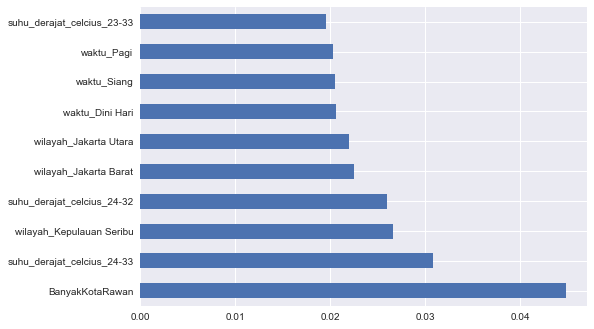

In [85]:
print(model.feature_importances_)
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

## Split Data

Memisahkan data untuk training dan testing, tetapi kali ini menjadi 80% kumpulan data training dan 20% testing.

BanyakKotaRawan  wilayah_Jakarta Barat  wilayah_Jakarta Pusat  \
0                    2                      0                      1   
1                    0                      0                      0   
2                   23                      0                      0   
3                   17                      1                      0   
4                   25                      0                      0   
...                ...                    ...                    ...   
14647               25                      0                      0   
14648               17                      1                      0   
14649               23                      0                      0   
14650               17                      1                      0   
14651               25                      0                      0   

       wilayah_Jakarta Selatan  wilayah_Jakarta Timur  wilayah_Jakarta Utara  \
0                            0                      0                      0   
1                            0                      0                      0   
2                            0                      1                      0   
3                            0                      0                      0   
4                            1                      0                      0   
...                        ...                    ...                    ...   
14647                        1                      0                      0   
14648                        0                      0                      0   
14649                        0                      1                      0   
14650                        0                      0                      0   
14651                        1                      0                      0   

       wilayah_Kepulauan Seribu  waktu_Dini Hari  waktu_Malam  waktu_Pagi  \
0                             0                0            0           1   
1                             1                0            1           0   
2                             0                0            1           0   
3                             0                0            1           0   
4                             0                0            1           0   
...                         ...              ...          ...         ...   
14647                         0                0            0           1   
14648                         0                0            0           1   
14649                         0                0            0           1   
14650                         0                0            1           0   
14651                         0                0            0           0   

       ...  suhu_derajat_celcius_25-31  suhu_derajat_celcius_25-32  \
0      ...                           0                           0   
1      ...                           0                           0   
2      ...                           0                           0   
3      ...                           0                           0   
4      ...                           0                           0   
...    ...                         ...                         ...   
14647  ...                           0                           0   
14648  ...                           0                           0   
14649  ...                           0                           0   
14650  ...                           0                           0   
14651  ...                           0                           0   

       suhu_derajat_celcius_25-33  suhu_derajat_celcius_25-34  \
0                               0                           0   
1                               0                           0   
2                               0                           0   
3                               0                           0   
4                               0                           0   
...                      

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y.iloc[:, 0], test_size=0.20, random_state=0, stratify=y.values.tolist())

# **Data Preprocessing - Normalize**

Scale the data to bring all features to the same level of magnitude, which means the feature / independent data will be within a specific range for example 0–100 or 0–1.

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
sc = StandardScaler()

In [65]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# **Remove Outlier**

In [91]:
X = df.drop(['cuaca'], axis = 1)
y = df[['cuaca']]

**Identify Outlier**

In [96]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor()
y_pred = clf.fit_predict(X)

X_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score
threshold = -2.5
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()

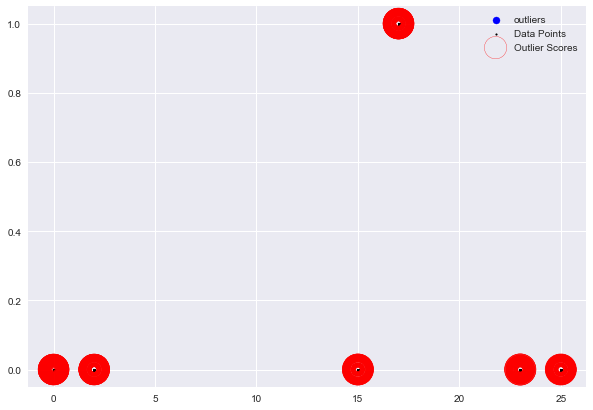

In [97]:
plt.figure(figsize=(10,7))
plt.scatter(X.iloc[outlier_index,0],X.iloc[outlier_index,1],color = "blue", s = 50, label = "outliers")
plt.scatter(X.iloc[:,0],X.iloc[:,1],color = "k", s = 3, label = "Data Points")
radius = (X_score.max()- X_score) / (X_score.max() - X_score.min())
outlier_score["radius"] = radius
plt.scatter(X.iloc[:,0],X.iloc[:,1],s = 1000*radius, edgecolors = "r", facecolors = "none", label = "Outlier Scores")
plt.legend() 
plt.show()

In [98]:
X = X.drop(outlier_index)
y = y.drop(outlier_index).values

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [ ]:
X.head(5)

**split data and normalize**

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y.tolist())

In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
sc = StandardScaler()

In [103]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Data Modelling

## **Logistic Regression**

### **Train Model**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

### **Test Model**

In [ ]:
model_score = logreg.score(X_test, y_test)

In [ ]:
print('Model Accuracy:', model_score)

Model Accuracy: 0.43408469945355194


In [ ]:
logreg.coef_

array([[-0.07499896, -0.05288684,  0.09456709, ...,  0.06193103,
         0.07197002,  0.0310113 ],
       [-0.05095391, -0.02604612,  0.12187572, ...,  0.1267976 ,
        -0.12367882,  0.15003964],
       [-0.21663136, -0.12863065,  0.02761396, ...,  0.11646515,
         0.21328998, -0.06942581],
       ...,
       [-0.07727066, -0.07069857, -0.0265638 , ...,  0.00809671,
        -0.13324914, -0.1233139 ],
       [ 0.02265839,  0.01682465, -0.08389158, ..., -0.27692287,
        -0.08964148, -0.10951331],
       [ 0.23451279,  0.25404691,  0.27371079, ...,  0.05272921,
         0.07283779,  0.06119788]])

In [ ]:
logreg.intercept_

array([ 3.91493349,  1.3168414 ,  0.26195696,  3.95010606, -6.69735411,
        2.74046272, -0.58092423,  1.66700645, -0.01725833, -6.55577041])

### **Tuning Parameter**

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RepeatedStratifiedKFold

# model = LogisticRegression()
# max_iter = [100, 200]
# penalty = ['l1', 'l2']
# C = np.logspace(-4,4,20)
# solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# #Menjadikan ke dalam bentuk dictionary
# grid = dict(solver=solver, penalty=penalty, C=C, max_iter=max_iter)

# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, y_train)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))


In [ ]:
logreg = LogisticRegression(C=0.615848211066026, max_iter=100, penalty='l2', solver='saga')
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(C=0.615848211066026, solver='saga')

In [ ]:
model_score = logreg.score(X_test, y_test)

In [ ]:
print('Model Accuracy:', model_score)

Model Accuracy: 0.43510928961748635


In [ ]:
logreg.coef_

array([[-0.03844475,  0.00222742,  0.10464974, ...,  0.05533849,
         0.07677881,  0.01394411],
       [-0.01477494,  0.02926145,  0.13219014, ...,  0.11775553,
        -0.11207218,  0.13228606],
       [-0.17989517, -0.074679  ,  0.03793086, ...,  0.09851102,
         0.21258329, -0.05151429],
       ...,
       [-0.04111341, -0.01521635, -0.01567219, ...,  0.00158825,
        -0.12906177, -0.12401047],
       [ 0.0584862 ,  0.07248325, -0.07389144, ..., -0.21602147,
        -0.0710793 , -0.09186186],
       [ 0.10096004,  0.10982953,  0.08189394, ...,  0.01225786,
         0.04303721,  0.03490079]])

In [ ]:
logreg.intercept_

array([ 3.03659356,  0.54281929, -0.36130002,  3.07540701, -3.69827932,
        1.85360132, -1.04796219,  0.84018789, -0.59657351, -3.64449402])

### **Visualize S-Curve**

In [ ]:
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve
# logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
# fpr, tpr, threshols = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
# plt.figure()
# plt.plot(fpr, tpr, label ='Logistic Regression (Area=%0.2f)'%logit_roc_auc)
# plt.plot([0,1],[0,1],'r--')
# plt.xlim([0.0,1.0])
# plt.ylim([0.0,1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Cuaca')
# plt.legend(loc="lower right")
# plt.show()

### **Prediction**

In [ ]:
y_predict = logreg.predict(X_test)

### **Confusion matrix and f1 accuracy**

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

Accuracy is: 0.43510928961748635


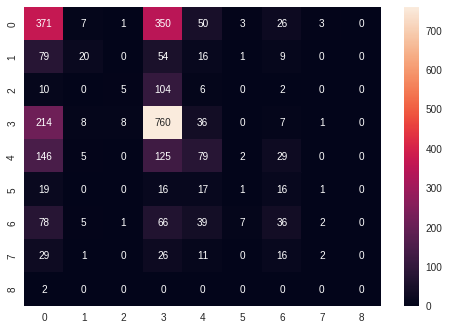

In [ ]:
ac= accuracy_score(y_test, y_predict)
print('Accuracy is:', ac)
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True,fmt='d')

In [ ]:
target_is = ["is " + x for x in target if not str(x) == "nan"]
target_predict = ["predicted " + x for x in target if not str(x) == "nan"]
from sklearn.metrics import classification_report, confusion_matrix
cm = np.array(confusion_matrix(y_test, y_predict, labels=range(len(target))))
confusion = pd.DataFrame(cm, index=target_is,
                         columns=target_predict)
confusion

predicted Berawan  ...  predicted Udara Kabur
is Berawan                      371  ...                      0
is Berawan Tebal                 79  ...                      0
is Cerah                         10  ...                      0
is Cerah Berawan                214  ...                      0
is Hujan                          0  ...                      0
is Hujan Ringan                 146  ...                      0
is Hujan Lokal                   19  ...                      0
is Hujan Petir                   78  ...                      0
is Hujan Sedang                  29  ...                      0
is Udara Kabur                    2  ...                      0

[10 rows x 10 columns]

In [ ]:
print('Acc',classification_report(y_test,y_predict))

Acc               precision    recall  f1-score   support

           0       0.39      0.46      0.42       811
           1       0.43      0.11      0.18       179
           2       0.33      0.04      0.07       127
           3       0.51      0.74      0.60      1034
           5       0.31      0.20      0.25       386
           6       0.07      0.01      0.02        70
           7       0.26      0.15      0.19       234
           8       0.22      0.02      0.04        85
           9       0.00      0.00      0.00         2

    accuracy                           0.44      2928
   macro avg       0.28      0.19      0.20      2928
weighted avg       0.40      0.44      0.39      2928



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Support Vector Machines (SVM)**

### **Train Model**

In [ ]:
from sklearn import svm

In [ ]:
svm_model = svm.SVC()

In [ ]:
svm_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

### **Test Model**

In [ ]:
svm_score = svm_model.score(X_test, y_test)

In [ ]:
print('Model Accuracy:', svm_score)

Model Accuracy: 0.4880464480874317


### **Tuning Parameter**

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RepeatedStratifiedKFold

# model = svm.SVC()
# kernel = ['poly', 'rbf', 'sigmoid', 'linear']
# C = np.logspace(-4,4,20)
# gamma = ['scale', 'auto', 100, 1, 0.1, 0.01, 0.001]

# #Menjadikan ke dalam bentuk dictionary
# grid = dict(kernel=kernel,C=C,gamma=gamma)

# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, y_train)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))


In [ ]:
svm_model = svm.SVC(C=11.288378916846883, gamma=0.01, kernel='rbf')

In [ ]:
svm_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=11.288378916846883, gamma=0.01)

In [ ]:
svm_score = svm_model.score(X_test, y_test)

In [ ]:
print('Model Accuracy:', svm_score)

Model Accuracy: 0.5327868852459017


### **Prediction**

In [ ]:
y_predict = svm_model.predict(X_test)

### **Confusion matrix and f1 accuracy**

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

Accuracy is: 0.5327868852459017


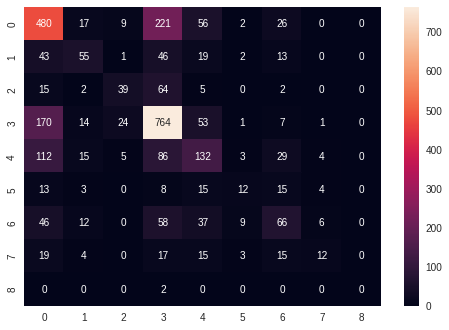

In [ ]:
ac= accuracy_score(y_test, y_predict)
print('Accuracy is:', ac)
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True,fmt='d')

In [ ]:
target_is = ["is " + x for x in target if not str(x) == "nan"]
target_predict = ["predicted " + x for x in target if not str(x) == "nan"]
from sklearn.metrics import classification_report, confusion_matrix
cm = np.array(confusion_matrix(y_test, y_predict, labels=range(len(target))))
confusion = pd.DataFrame(cm, index=target_is,
                         columns=target_predict)
confusion

predicted Berawan  ...  predicted Udara Kabur
is Berawan                      480  ...                      0
is Berawan Tebal                 43  ...                      0
is Cerah                         15  ...                      0
is Cerah Berawan                170  ...                      0
is Hujan                          0  ...                      0
is Hujan Ringan                 112  ...                      0
is Hujan Lokal                   13  ...                      0
is Hujan Petir                   46  ...                      0
is Hujan Sedang                  19  ...                      0
is Udara Kabur                    0  ...                      0

[10 rows x 10 columns]

In [ ]:
print('Acc',classification_report(y_test,y_predict))

Acc               precision    recall  f1-score   support

           0       0.53      0.59      0.56       811
           1       0.45      0.31      0.37       179
           2       0.50      0.31      0.38       127
           3       0.60      0.74      0.66      1034
           5       0.40      0.34      0.37       386
           6       0.38      0.17      0.24        70
           7       0.38      0.28      0.32       234
           8       0.44      0.14      0.21        85
           9       0.00      0.00      0.00         2

    accuracy                           0.53      2928
   macro avg       0.41      0.32      0.35      2928
weighted avg       0.52      0.53      0.52      2928



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Decision Tree**

### **Train Model**

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

### **Test Model**

In [ ]:
model_score = clf_entropy.score(X_test,y_test)

In [ ]:
print('Model Accuracy:', model_score)

Model Accuracy: 0.3637295081967213


### **Prediction**

In [ ]:
y_predict = clf_entropy.predict(X_test)

In [ ]:
y_predict

array([0, 3, 0, ..., 0, 0, 3])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print('Accuracy score:', accuracy_score(y_test,y_predict))

Accuracy score: 0.3637295081967213


In [ ]:
clf_entropy.feature_importances_

array([0.44177151, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.22096793,
       0.23948066, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0977799 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### **Tuning Parameter**

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RepeatedStratifiedKFold
# from scipy.stats import randint

# model = DecisionTreeClassifier()

# criterion= ['entropy']
# max_depth= np.linspace(1, 32, 32, endpoint=True)
# min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
# min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

# #Menjadikan ke dalam bentuk dictionary
# grid = dict(criterion=criterion, max_depth=max_depth, min_samples_leaf=min_samples_leafs, min_samples_split=min_samples_splits)

# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, y_train)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
clf_entropy_tuning = DecisionTreeClassifier(criterion='entropy', max_depth=1.0, min_samples_leaf=0.1, min_samples_split=0.1)
clf_entropy_tuning.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1.0, min_samples_leaf=0.1,
                       min_samples_split=0.1)

In [ ]:
model_score = clf_entropy_tuning.score(X_test,y_test)

In [ ]:
print('Model Accuracy:', model_score)

Model Accuracy: 0.3531420765027322


In [ ]:
y_predict = clf_entropy_tuning.predict(X_test)

In [ ]:
print('Accuracy score:', accuracy_score(y_test,y_predict))

Accuracy score: 0.3531420765027322


### **Display the Tree**

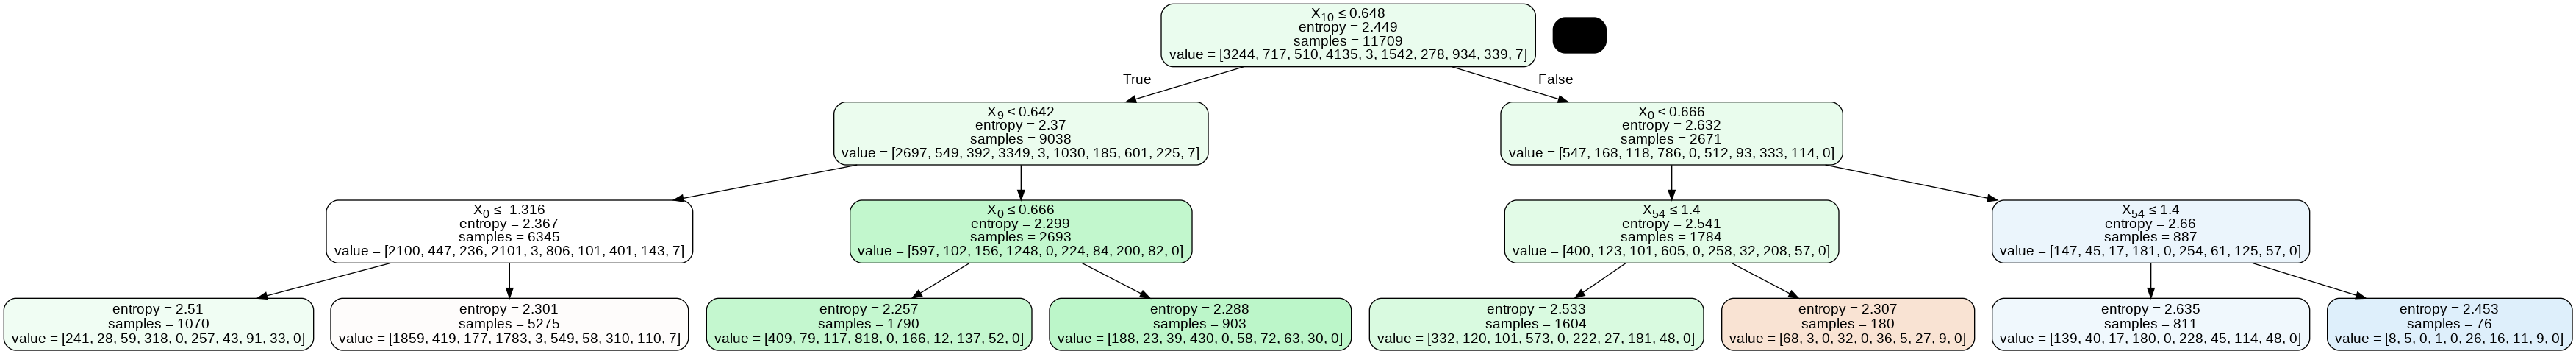

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf_entropy, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('brestcancer.png')
Image(graph.create_png())

### **Confusion matrix and f1 accuracy**

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

Accuracy is: 0.3531420765027322


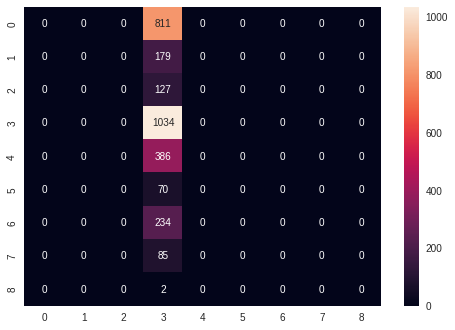

In [ ]:
ac= accuracy_score(y_test, y_predict)
print('Accuracy is:', ac)
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True,fmt='d')

In [ ]:
target_is = ["is " + x for x in target if not str(x) == "nan"]
target_predict = ["predicted " + x for x in target if not str(x) == "nan"]
from sklearn.metrics import classification_report, confusion_matrix
cm = np.array(confusion_matrix(y_test, y_predict, labels=range(len(target))))
confusion = pd.DataFrame(cm, index=target_is,
                         columns=target_predict)
confusion

predicted Berawan  ...  predicted Udara Kabur
is Berawan                        0  ...                      0
is Berawan Tebal                  0  ...                      0
is Cerah                          0  ...                      0
is Cerah Berawan                  0  ...                      0
is Hujan                          0  ...                      0
is Hujan Ringan                   0  ...                      0
is Hujan Lokal                    0  ...                      0
is Hujan Petir                    0  ...                      0
is Hujan Sedang                   0  ...                      0
is Udara Kabur                    0  ...                      0

[10 rows x 10 columns]

In [ ]:
print('Acc',classification_report(y_test,y_predict))

Acc               precision    recall  f1-score   support

           0       0.00      0.00      0.00       811
           1       0.00      0.00      0.00       179
           2       0.00      0.00      0.00       127
           3       0.35      1.00      0.52      1034
           5       0.00      0.00      0.00       386
           6       0.00      0.00      0.00        70
           7       0.00      0.00      0.00       234
           8       0.00      0.00      0.00        85
           9       0.00      0.00      0.00         2

    accuracy                           0.35      2928
   macro avg       0.04      0.11      0.06      2928
weighted avg       0.12      0.35      0.18      2928



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Random Forest**

### **Train Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier()

### **Test Model**

In [ ]:
model_score = rf_clf.score(X_test,y_test)

In [ ]:
print('Model Accuracy:', model_score)

Model Accuracy: 0.4689207650273224


### **Tuning Parameter**

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RepeatedStratifiedKFold

# model = RandomForestClassifier()

# bootstrap = [True, False],
# n_estimators = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
# max_features = ['auto', 'sqrt', 'log2']
# max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
# min_samples_leaf = [1, 2, 4]
# min_samples_split = [2, 5, 10]

# #Menjadikan ke dalam bentuk dictionary
# grid = dict(bootstrap=bootstrap, n_estimators=n_estimators,max_features=max_features, max_depth=max_depth, min_samples_leaf=min_samples_leaf)

# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, y_train)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

### **Check Importance Score**

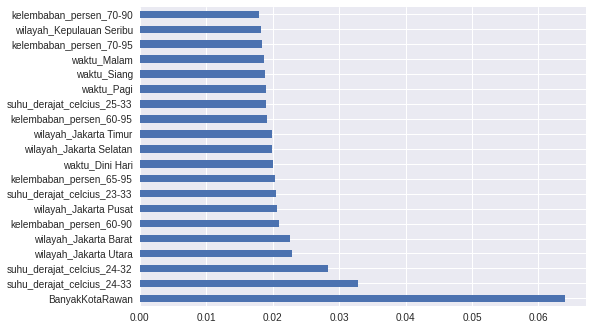

In [ ]:
features = np.array(df.drop(['cuaca'], axis = 1).columns)
importance_score = rf_clf.feature_importances_
indices = np.argsort(importance_score)

feature_importances = pd.Series(rf_clf.feature_importances_, index=features)
feature_importances.nlargest(20).plot(kind='barh')

### **Predition**

In [ ]:
y_predict = rf_clf.predict(X_test)

### **Display the Tree**

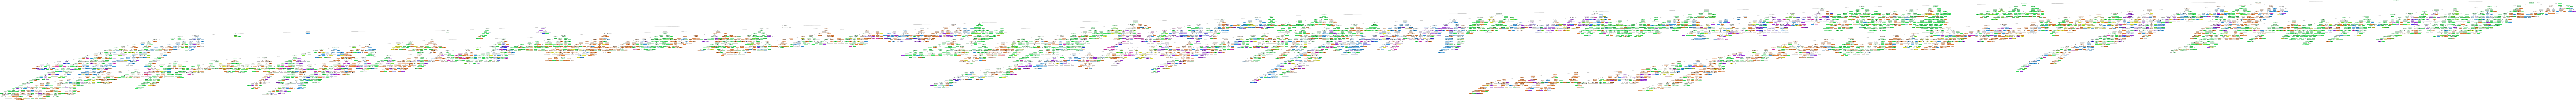

In [ ]:
from sklearn.tree import export_graphviz

estimator = rf_clf.estimators_[0]

export_graphviz(estimator, rounded=True, proportion=False, out_file='tree.dot',
                feature_names=X.columns, precision=2, filled=True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

### **Confusion matrix and f1 accuracy**

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

Accuracy is: 0.4689207650273224


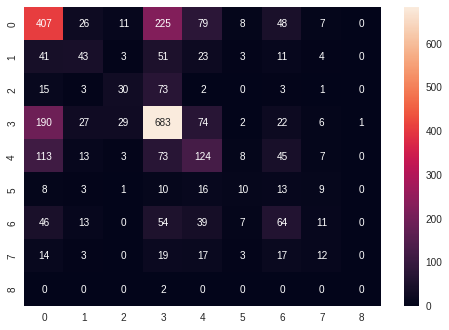

In [ ]:
ac= accuracy_score(y_test, y_predict)
print('Accuracy is:', ac)
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True,fmt='d')

In [ ]:
target_is = ["is " + x for x in target if not str(x) == "nan"]
target_predict = ["predicted " + x for x in target if not str(x) == "nan"]
from sklearn.metrics import classification_report, confusion_matrix
cm = np.array(confusion_matrix(y_test, y_predict, labels=range(len(target))))
confusion = pd.DataFrame(cm, index=target_is,
                         columns=target_predict)
confusion

predicted Berawan  ...  predicted Udara Kabur
is Berawan                      407  ...                      0
is Berawan Tebal                 41  ...                      0
is Cerah                         15  ...                      0
is Cerah Berawan                190  ...                      1
is Hujan                          0  ...                      0
is Hujan Ringan                 113  ...                      0
is Hujan Lokal                    8  ...                      0
is Hujan Petir                   46  ...                      0
is Hujan Sedang                  14  ...                      0
is Udara Kabur                    0  ...                      0

[10 rows x 10 columns]

In [ ]:
print('Acc',classification_report(y_test,y_predict))

Acc               precision    recall  f1-score   support

           0       0.49      0.50      0.49       811
           1       0.33      0.24      0.28       179
           2       0.39      0.24      0.29       127
           3       0.57      0.66      0.61      1034
           5       0.33      0.32      0.33       386
           6       0.24      0.14      0.18        70
           7       0.29      0.27      0.28       234
           8       0.21      0.14      0.17        85
           9       0.00      0.00      0.00         2

    accuracy                           0.47      2928
   macro avg       0.32      0.28      0.29      2928
weighted avg       0.45      0.47      0.46      2928



# **Save Model**

In [104]:
import pickle

In [ ]:
pkl_filename = ["logreg.pkl", "svm_model.pkl", "desicion_tree.pkl", "random_forest.pkl"]
model = [logreg, svm_model, clf_entropy, rf_clf]

In [ ]:
for i in range(len(model)):
  with open(pkl_filename[i],'wb') as file:
    pickle.dump(model[i],file)

# **Conclusion Result**

In [ ]:
model = {
    "Logistic Regression": logreg, 
    "Support Vector Machine (Classifier)": svm_model, 
    "Decision Tree Classifier": clf_entropy, 
    "Random Forest Classifier": rf_clf
}

In [ ]:
for name, model_type in model.items():
    print(name, 'Training Accuracy:', model_type.score(X_train, y_train))

Logistic Regression Training Accuracy: 0.46032966094457256
Support Vector Machine (Classifier) Training Accuracy: 0.67384063540866
Decision Tree Classifier Training Accuracy: 0.3689469638739431
Random Forest Classifier Training Accuracy: 0.7338799214279614


In [ ]:
for name, model_type in model.items():
    print(name, 'Testing Accuracy:', model_type.score(X_test, y_test))

Logistic Regression Testing Accuracy: 0.43510928961748635
Support Vector Machine (Classifier) Testing Accuracy: 0.5327868852459017
Decision Tree Classifier Testing Accuracy: 0.3637295081967213
Random Forest Classifier Testing Accuracy: 0.4689207650273224


**Confusion matrix and f1 accuracy**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

target_is = ["is " + x for x in target if not str(x) == "nan"]
target_predict = ["predicted " + x for x in target if not str(x) == "nan"]

for name, model_type in model.items():
  print("\n-------",name,"-------\n")
  y_predict = model_type.predict(X_test)
  cm = np.array(confusion_matrix(y_test, y_predict, labels=range(len(target))))
  confusion = pd.DataFrame(cm, index=target_is, columns=target_predict)
  print(confusion)


------- Logistic Regression -------

                  predicted Berawan  ...  predicted Udara Kabur
is Berawan                      371  ...                      0
is Berawan Tebal                 79  ...                      0
is Cerah                         10  ...                      0
is Cerah Berawan                214  ...                      0
is Hujan                          0  ...                      0
is Hujan Ringan                 146  ...                      0
is Hujan Lokal                   19  ...                      0
is Hujan Petir                   78  ...                      0
is Hujan Sedang                  29  ...                      0
is Udara Kabur                    2  ...                      0

[10 rows x 10 columns]

------- Support Vector Machine (Classifier) -------

                  predicted Berawan  ...  predicted Udara Kabur
is Berawan                      480  ...                      0
is Berawan Tebal                 43  ...            

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

for name, model_type in model.items():
  print("\n-------",name,"-------\n")
  y_predict = model_type.predict(X_test)
  print(classification_report(y_test,y_predict))


------- Logistic Regression -------

              precision    recall  f1-score   support

           0       0.39      0.46      0.42       811
           1       0.43      0.11      0.18       179
           2       0.33      0.04      0.07       127
           3       0.51      0.74      0.60      1034
           5       0.31      0.20      0.25       386
           6       0.07      0.01      0.02        70
           7       0.26      0.15      0.19       234
           8       0.22      0.02      0.04        85
           9       0.00      0.00      0.00         2

    accuracy                           0.44      2928
   macro avg       0.28      0.19      0.20      2928
weighted avg       0.40      0.44      0.39      2928


------- Support Vector Machine (Classifier) -------



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.53      0.59      0.56       811
           1       0.45      0.31      0.37       179
           2       0.50      0.31      0.38       127
           3       0.60      0.74      0.66      1034
           5       0.40      0.34      0.37       386
           6       0.38      0.17      0.24        70
           7       0.38      0.28      0.32       234
           8       0.44      0.14      0.21        85
           9       0.00      0.00      0.00         2

    accuracy                           0.53      2928
   macro avg       0.41      0.32      0.35      2928
weighted avg       0.52      0.53      0.52      2928


------- Decision Tree Classifier -------

              precision    recall  f1-score   support

           0       0.36      0.60      0.45       811
           1       0.00      0.00      0.00       179
           2       0.00      0.00      0.00       127
           3       0.39      0.50  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

# **Deep Learning**

In [106]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense

In [107]:
model = Sequential([
    Dense(128, activation = 'relu', input_shape=(104,)),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               13440     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 24,106
Trainable params: 24,106
Non-trainable params: 0
_________________________________________________________________


In [108]:
model.compile(
    optimizer = 'Adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [109]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

In [110]:
mc = ModelCheckpoint('deeplearning.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [111]:
history = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_test, y_test), 
    epochs=500, 
    batch_size=len(X_train), 
    callbacks=[es, mc], 
    verbose=1
)

history.history['accuracy'][-1]

Epoch 1/500
1/1 [==============================] - ETA: 0s - loss: 2.3399 - accuracy: 0.0829
Epoch 00001: val_accuracy improved from -inf to 0.12671, saving model to deeplearning.h5
1/1 [==============================] - 1s 609ms/step - loss: 2.3399 - accuracy: 0.0829 - val_loss: 2.2602 - val_accuracy: 0.1267
Epoch 2/500
1/1 [==============================] - ETA: 0s - loss: 2.2691 - accuracy: 0.1210
Epoch 00002: val_accuracy improved from 0.12671 to 0.16291, saving model to deeplearning.h5
1/1 [==============================] - 0s 72ms/step - loss: 2.2691 - accuracy: 0.1210 - val_loss: 2.1968 - val_accuracy: 0.1629
Epoch 3/500
1/1 [==============================] - ETA: 0s - loss: 2.2025 - accuracy: 0.1641
Epoch 00003: val_accuracy improved from 0.16291 to 0.21687, saving model to deeplearning.h5
1/1 [==============================] - 0s 72ms/step - loss: 2.2025 - accuracy: 0.1641 - val_loss: 2.1366 - val_accuracy: 0.2169
Epoch 4/500
1/1 [==============================] - ETA: 0s - lo

Epoch 29/500
1/1 [==============================] - ETA: 0s - loss: 1.6191 - accuracy: 0.4031
Epoch 00029: val_accuracy improved from 0.39515 to 0.39891, saving model to deeplearning.h5
1/1 [==============================] - 0s 62ms/step - loss: 1.6191 - accuracy: 0.4031 - val_loss: 1.6336 - val_accuracy: 0.3989
Epoch 30/500
1/1 [==============================] - ETA: 0s - loss: 1.6093 - accuracy: 0.4058
Epoch 00030: val_accuracy improved from 0.39891 to 0.39993, saving model to deeplearning.h5
1/1 [==============================] - 0s 65ms/step - loss: 1.6093 - accuracy: 0.4058 - val_loss: 1.6253 - val_accuracy: 0.3999
Epoch 31/500
1/1 [==============================] - ETA: 0s - loss: 1.5995 - accuracy: 0.4081
Epoch 00031: val_accuracy did not improve from 0.39993
1/1 [==============================] - 0s 40ms/step - loss: 1.5995 - accuracy: 0.4081 - val_loss: 1.6171 - val_accuracy: 0.3989
Epoch 32/500
1/1 [==============================] - ETA: 0s - loss: 1.5898 - accuracy: 0.4105
E

1/1 [==============================] - ETA: 0s - loss: 1.4171 - accuracy: 0.4639
Epoch 00056: val_accuracy improved from 0.42964 to 0.43101, saving model to deeplearning.h5
1/1 [==============================] - 0s 71ms/step - loss: 1.4171 - accuracy: 0.4639 - val_loss: 1.4771 - val_accuracy: 0.4310
Epoch 57/500
1/1 [==============================] - ETA: 0s - loss: 1.4121 - accuracy: 0.4657
Epoch 00057: val_accuracy improved from 0.43101 to 0.43204, saving model to deeplearning.h5
1/1 [==============================] - 0s 69ms/step - loss: 1.4121 - accuracy: 0.4657 - val_loss: 1.4737 - val_accuracy: 0.4320
Epoch 58/500
1/1 [==============================] - ETA: 0s - loss: 1.4072 - accuracy: 0.4678
Epoch 00058: val_accuracy improved from 0.43204 to 0.43443, saving model to deeplearning.h5
1/1 [==============================] - 0s 70ms/step - loss: 1.4072 - accuracy: 0.4678 - val_loss: 1.4703 - val_accuracy: 0.4344
Epoch 59/500
1/1 [==============================] - ETA: 0s - loss: 1.4

1/1 [==============================] - 0s 75ms/step - loss: 1.3094 - accuracy: 0.5041 - val_loss: 1.4051 - val_accuracy: 0.4577
Epoch 84/500
1/1 [==============================] - ETA: 0s - loss: 1.3061 - accuracy: 0.5046
Epoch 00084: val_accuracy improved from 0.45765 to 0.45902, saving model to deeplearning.h5
1/1 [==============================] - 0s 76ms/step - loss: 1.3061 - accuracy: 0.5046 - val_loss: 1.4030 - val_accuracy: 0.4590
Epoch 85/500
1/1 [==============================] - ETA: 0s - loss: 1.3028 - accuracy: 0.5058
Epoch 00085: val_accuracy improved from 0.45902 to 0.46038, saving model to deeplearning.h5
1/1 [==============================] - 0s 81ms/step - loss: 1.3028 - accuracy: 0.5058 - val_loss: 1.4009 - val_accuracy: 0.4604
Epoch 86/500
1/1 [==============================] - ETA: 0s - loss: 1.2995 - accuracy: 0.5070
Epoch 00086: val_accuracy did not improve from 0.46038
1/1 [==============================] - 0s 42ms/step - loss: 1.2995 - accuracy: 0.5070 - val_los

1/1 [==============================] - 0s 76ms/step - loss: 1.2224 - accuracy: 0.5320 - val_loss: 1.3529 - val_accuracy: 0.4792
Epoch 111/500
1/1 [==============================] - ETA: 0s - loss: 1.2192 - accuracy: 0.5332
Epoch 00111: val_accuracy improved from 0.47917 to 0.48019, saving model to deeplearning.h5
1/1 [==============================] - 0s 67ms/step - loss: 1.2192 - accuracy: 0.5332 - val_loss: 1.3510 - val_accuracy: 0.4802
Epoch 112/500
1/1 [==============================] - ETA: 0s - loss: 1.2160 - accuracy: 0.5353
Epoch 00112: val_accuracy improved from 0.48019 to 0.48122, saving model to deeplearning.h5
1/1 [==============================] - 0s 77ms/step - loss: 1.2160 - accuracy: 0.5353 - val_loss: 1.3492 - val_accuracy: 0.4812
Epoch 113/500
1/1 [==============================] - ETA: 0s - loss: 1.2128 - accuracy: 0.5365
Epoch 00113: val_accuracy improved from 0.48122 to 0.48190, saving model to deeplearning.h5
1/1 [==============================] - 0s 77ms/step - l

1/1 [==============================] - 0s 67ms/step - loss: 1.1346 - accuracy: 0.5675 - val_loss: 1.3144 - val_accuracy: 0.4997
Epoch 138/500
1/1 [==============================] - ETA: 0s - loss: 1.1313 - accuracy: 0.5688
Epoch 00138: val_accuracy improved from 0.49966 to 0.50000, saving model to deeplearning.h5
1/1 [==============================] - 0s 64ms/step - loss: 1.1313 - accuracy: 0.5688 - val_loss: 1.3134 - val_accuracy: 0.5000
Epoch 139/500
1/1 [==============================] - ETA: 0s - loss: 1.1281 - accuracy: 0.5702
Epoch 00139: val_accuracy did not improve from 0.50000
1/1 [==============================] - 0s 42ms/step - loss: 1.1281 - accuracy: 0.5702 - val_loss: 1.3125 - val_accuracy: 0.4997
Epoch 140/500
1/1 [==============================] - ETA: 0s - loss: 1.1248 - accuracy: 0.5721
Epoch 00140: val_accuracy did not improve from 0.50000
1/1 [==============================] - 0s 42ms/step - loss: 1.1248 - accuracy: 0.5721 - val_loss: 1.3116 - val_accuracy: 0.5000
E

1/1 [==============================] - ETA: 0s - loss: 1.0453 - accuracy: 0.6018
Epoch 00165: val_accuracy improved from 0.51400 to 0.51469, saving model to deeplearning.h5
1/1 [==============================] - 0s 77ms/step - loss: 1.0453 - accuracy: 0.6018 - val_loss: 1.2953 - val_accuracy: 0.5147
Epoch 166/500
1/1 [==============================] - ETA: 0s - loss: 1.0422 - accuracy: 0.6029
Epoch 00166: val_accuracy improved from 0.51469 to 0.51537, saving model to deeplearning.h5
1/1 [==============================] - 0s 71ms/step - loss: 1.0422 - accuracy: 0.6029 - val_loss: 1.2949 - val_accuracy: 0.5154
Epoch 167/500
1/1 [==============================] - ETA: 0s - loss: 1.0391 - accuracy: 0.6042
Epoch 00167: val_accuracy did not improve from 0.51537
1/1 [==============================] - 0s 39ms/step - loss: 1.0391 - accuracy: 0.6042 - val_loss: 1.2945 - val_accuracy: 0.5147
Epoch 168/500
1/1 [==============================] - ETA: 0s - loss: 1.0360 - accuracy: 0.6053
Epoch 00168

1/1 [==============================] - ETA: 0s - loss: 0.9608 - accuracy: 0.6334
Epoch 00194: val_accuracy did not improve from 0.51537
1/1 [==============================] - 0s 39ms/step - loss: 0.9608 - accuracy: 0.6334 - val_loss: 1.2915 - val_accuracy: 0.5061
Epoch 195/500
1/1 [==============================] - ETA: 0s - loss: 0.9581 - accuracy: 0.6352
Epoch 00195: val_accuracy did not improve from 0.51537
1/1 [==============================] - 0s 39ms/step - loss: 0.9581 - accuracy: 0.6352 - val_loss: 1.2919 - val_accuracy: 0.5068
Epoch 196/500
1/1 [==============================] - ETA: 0s - loss: 0.9554 - accuracy: 0.6363
Epoch 00196: val_accuracy did not improve from 0.51537
1/1 [==============================] - 0s 39ms/step - loss: 0.9554 - accuracy: 0.6363 - val_loss: 1.2922 - val_accuracy: 0.5061
Epoch 197/500
1/1 [==============================] - ETA: 0s - loss: 0.9527 - accuracy: 0.6369
Epoch 00197: val_accuracy did not improve from 0.51537
1/1 [=========================

Epoch 224/500
1/1 [==============================] - ETA: 0s - loss: 0.8850 - accuracy: 0.6588
Epoch 00224: val_accuracy did not improve from 0.51537
1/1 [==============================] - 0s 39ms/step - loss: 0.8850 - accuracy: 0.6588 - val_loss: 1.3040 - val_accuracy: 0.5113
Epoch 225/500
1/1 [==============================] - ETA: 0s - loss: 0.8826 - accuracy: 0.6587
Epoch 00225: val_accuracy did not improve from 0.51537
1/1 [==============================] - 0s 42ms/step - loss: 0.8826 - accuracy: 0.6587 - val_loss: 1.3052 - val_accuracy: 0.5085
Epoch 226/500
1/1 [==============================] - ETA: 0s - loss: 0.8801 - accuracy: 0.6607
Epoch 00226: val_accuracy did not improve from 0.51537
1/1 [==============================] - 0s 43ms/step - loss: 0.8801 - accuracy: 0.6607 - val_loss: 1.3063 - val_accuracy: 0.5099
Epoch 227/500
1/1 [==============================] - ETA: 0s - loss: 0.8778 - accuracy: 0.6615
Epoch 00227: val_accuracy did not improve from 0.51537
1/1 [===========

0.6664104461669922

In [112]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.667, Valid: 0.510


In [113]:
from keras.models import load_model
saved_model = load_model('deeplearning.h5')
_, train_acc = saved_model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = saved_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.604, Valid: 0.515


In [137]:
saved_model.predict(X_test)

array([[7.10317940e-02, 5.44221140e-04, 6.53638959e-01, ...,
        6.33204181e-05, 2.69952543e-05, 1.87861488e-07],
       [3.78751308e-01, 1.24967517e-02, 2.17724568e-03, ...,
        7.63368011e-02, 5.89978620e-02, 3.80023048e-05],
       [5.24943888e-01, 1.92308370e-02, 7.11607412e-02, ...,
        1.45594645e-02, 3.68474983e-04, 5.47976697e-06],
       ...,
       [5.28865218e-01, 4.72626230e-03, 9.95400622e-02, ...,
        2.41039158e-03, 5.12776569e-05, 3.69976478e-05],
       [9.97524858e-02, 3.99780663e-04, 1.76658574e-03, ...,
        2.03755553e-04, 1.68932320e-06, 1.43525796e-07],
       [3.17072093e-01, 3.05736791e-02, 1.03735417e-01, ...,
        6.03800230e-02, 1.10757642e-03, 5.63275398e-06]], dtype=float32)

In [147]:
output = saved_model.predict(X_test)

In [ ]:
output = round(prediction[0])
    if output == '0':
        print("Berawan")
    elif output =='1':
        print("Berawan Tebal")
    elif output =='2':
        print("Cerah")
    elif output =='3':
        print("Cerah Berawan")
    elif output =='4':
        print("Hujan")
    elif output =='5':
        print("Hujan Lokal")
    elif output =='6':
        print("Hujan Petir")
    elif output =='7':
        print("Hujan Ringan")
    elif output =='8':
        print("Hujan Sedang")
    elif output =='9':
        print("Udara Kabut")

## -- Plot Model

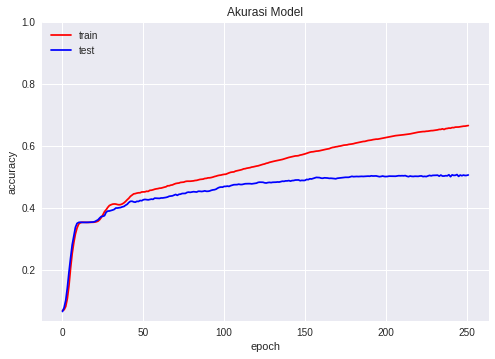

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='blue')
plt.ylim(top=1)
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

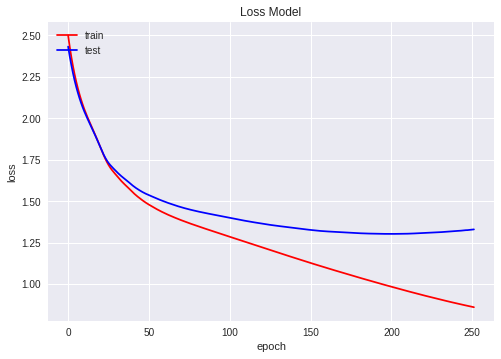

In [ ]:
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()